# Contrôle continu

- **thème** : Programmation orientée objet
- **durée** : 1h30

Une **file** est une structure de données linéaire où l'arrivée de nouveaux éléments se fait à une extrémité et le retrait des éléments se fait à l'autre extrémité. Il s'agit donc d'une structure dite _fifo_ : _first in first out_ (premier arrivé, premier sorti).

## Modèle

On utilise une structure de liste chainée pour implémenter une file. Un _maillon_ de la file contient une valeur (par souci de simplification nous allons considérer ici une file d'entiers) et une référence vers un autre _maillon_.

### Q1. La classe `Maillon`

Définir une classe `Maillon` qui comporte deux propriétés :

- `value`  qui sera une valeur entière
- `suivant` qui vaudra `None` (valeur par défaut) ou une référence vers un autre `Maillon` 

A l'initialisation, on doit passer la valeur (on ne fera aucune vérification que la valeur est bien entière). On supposera de plus qu'une méthode `__str__`  a été écrite pour un affichage _sympa_ d'un maillon.

#### Exemple

Créons trois maillons, chainés les uns aux autres :

```python
>>> m1 = Maillon(10)
>>> m2 = Maillon(-1, m1)
>>> m3 = Maillon(8, m2)
```

Voici un diagramme _pythontutor_ du résultat :

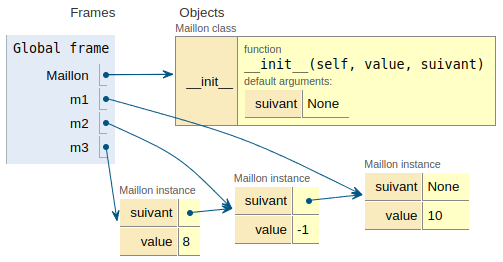

On supposera défini une méthode `__str__` qui permet d'afficher les maillons sous la forme `( )-->` (la valeur en parenthèses et une flèche vers le suivant. Par exemple :

```python
>>> print(m3)
```
```
(8)--> 
```
```python
>>> print(m3.suivant)
```
```
(-1)--> 
```
```python
>>> print(m1.suivant)
```
```
None
```


## 2. La classe `File`

#### Q2.1 Définir l'initialiseur

Une File est une liste chaînée de 0, 1 ou plusieurs maillons. L'objet `File` possède deux propriétés :

- `tete` qui vaut soit `None` (quand la file ne contient aucun maillon, ce sera la valeur par défaut), soit une référence vers le premier maillon c'est-à-dire celui qu'on va retirer en premier
- `queue` qui vaut soit `None` (quand la file ne contient aucun maillon, ce sera la valeur par défaut), soit une référence vers le dernier maillon c'est-à-dire là où l'on va ajouter le prochain arrivant.

Voici la liste chainée précédente, vue comme une file :

```
 tete            queue
  |               |
  v               v
 (8)--> (-1)--> (10)--> ∅
 ```

#### Q2.2 `est_vide`

Définir la méthode `est_vide` qui renvoie `True` si et seulement si la file est vide.

#### Q2.3 `add`

Définir la méthode `add` qui prend un entier $a$ en paramètre et ajoute cet entier dans la file (sous la forme d'un nouveau maillon). Voici les étapes à réaliser :

- Créer un nouveau Maillon contenant la valeur $a$ :
   ```
   (a)-->
   ```
- Si la File n'est pas vide, faire pointer le suivant de la _queue_ vers ce nouveau Maillon :
    ```
     tete           queue
      |              |
      v              v
    (  )--> ...    (  )--> (a)--> ∅
    ```
- Sinon, faire pointer la _tete_ vers ce nouveau Maillon :
    ```
    tete  queue
     |     |
     v     v
    (a)--> ∅
    ```
- Dans les 2 cas faire pointer _queue_ vers le nouveau Maillon :
   ```
   tete                  queue
    |                     |
    v                     v
  (  )-->  ...  (  )--> (a)--> ∅
  ```

  ou

  ```
  tete queue
     | |
     v v     
   (  a  )--> ∅
 ```


#### Q2.4 `pop`

`pop` est la méthode pour retirer un élément de la file. Le retrait se fait **toujours** du côté de la `tete`.

1. Dessiner la file contenant les valeurs 42 (première arrivée) et 24. Faites bien apparaître les maillons, le lien entre eux ainsi que la référence _tete_ et la _queue_
2. On retirer une valeur, et re-dessiner la nouvelle file.
3. Quelles sont les étapes de retrait d'un élément si la file contient plus d'un élément ?
4. Quelles sont les étapes de retrait dans le cas d'un seul élément ?
5. Définir la méthode `pop`

In [48]:
class Maillon:
    
    # -- Q1 --
    def __init__(self, value, suivant=None):
        self.value = value
        self.suivant = suivant
        
    # -- donné --
    def __str__(self):
        return f'({self.value})--> '

class File:
    
    # -- Q2.1 --
    def __init__(self):
        self.tete = None
        self.queue = None
    
    # -- non demandé --
    def __str__(self):
        s = 'tete : '
        m = self.tete
        while m != self.queue:
            s += str(m) + ' '
            m = m.suivant
        s += 'queue : '
        s += str(self.queue) if self.queue is not None else ''
        return s + '∅\n'
    
    # -- Q2.2 --
    def est_vide(self):
        return self.tete is None
    
    # -- Q2.3 --
    def add(self, elt):
        nouveau = Maillon(elt)
        if not self.est_vide():
            self.queue.suivant = nouveau
        else:
            self.tete = nouveau
        self.queue = nouveau
        
    # -- Q2.4.5 --
    def pop(self):
        if not self.est_vide():
            depart = self.tete
            self.tete = self.tete.suivant
            if self.est_vide():
                self.queue = self.tete
            return depart.value

#### Q2.4.1

```
  tete        queue
     |        |
     v        v
    (42)--> (24)--> ∅
```

#### Q2.4.2

```
  tete queue
     | |
     v v
    (24)--> ∅
```

#### Q2.4.3

Si la file contient plus d'un élément :

1. on référence le maillon de tête par une variable `depart`
2. on fait pointer `tete` vers le suivant de `tete` 
3. on renvoie la valeur de `depart`

#### Q2.4.4

Si la file ne contient qu'un élément, on réalise les mêmes étapes que précédemment mais après le point 2, on effectue une étape 2bis : faire pointer `queue` vers `tete`.

In [49]:
F = File()

In [50]:
print(F)

tete : queue : ∅



In [51]:
F.add(42)

In [52]:
print(F)

tete : queue : (42)--> ∅



In [40]:
F.add(-1)

In [41]:
print(F)

tete : (8)-->  queue : (-1)--> 



In [53]:
F.add(24)

In [54]:
print(F)

tete : (42)-->  queue : (24)--> ∅



In [55]:
F.add(1)

In [56]:
print(F)

tete : (42)-->  (24)-->  queue : (1)--> ∅



In [57]:
F.pop()

42

In [58]:
print(F)

tete : (24)-->  queue : (1)--> ∅



In [59]:
F.pop()
F.pop()

1

In [60]:
F.pop()

In [61]:
print(F)

tete : queue : ∅



In [62]:
F.est_vide()

True

In [7]:
m1 = Maillon(10)

In [8]:
m2 = Maillon(-1, m1)

In [9]:
m3 = Maillon(8, m2)

In [10]:
print(m3)

(8)--> (-1)--> (10)--> ∅


In [28]:
F.pop()

8

In [29]:
print(F)

(-1)--> (10)--> ∅
